In [1]:
%matplotlib inline

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle
import tensorflow as tf
import numpy as np 

In [3]:
##load data############################################################################################################
Xtest = np.matrix(np.loadtxt("../post/testdata/Car_test_X6.csv",delimiter=',', dtype=np.float64));
Ytest = np.matrix(np.loadtxt("../post/testdata/Car_test_Y6.csv",delimiter=',', dtype=np.float64));
Ztest = np.matrix(np.loadtxt("../post/testdata/Car_test_Z6.csv",delimiter=',', dtype=np.float64));
#######################################################################################################################

In [4]:
##trure data###########################################################################################################
ti = 100 ##testing point
tLen = 1500  ##testing length
Ycom = np.transpose(Ytest[(ti):(ti+tLen),:])
Zcom = np.transpose(Ztest[(ti):(ti+tLen),:])
#######################################################################################################################

In [5]:
print(Zcom.shape)

(2, 1500)


In [6]:
##testng data##########################################################################################################
t = np.arange(tLen)
t = np.reshape(t,(1,tLen))

t = t + 100

Y1_com = Ycom[0,:].flatten()
Y2_com = Ycom[1,:].flatten()
Z1_com = Zcom[0,:].flatten()
Z2_com = Zcom[1,:].flatten()


t = t.flatten()
Y1_com = (np.asarray(Y1_com)).flatten()
Y2_com = (np.asarray(Y2_com)).flatten()
Z1_com = (np.asarray(Z1_com)).flatten()
Z2_com = (np.asarray(Z2_com)).flatten()
########################################################################################################################################### 

In [7]:
##Emd-Phy-Cas############################################################################################################
VVcY1 = np.loadtxt("../post/ry1.csv",delimiter=',', dtype=np.float64);
VVcY2 = np.loadtxt("../post/ry2.csv",delimiter=',', dtype=np.float64);
VVcZ1 = np.loadtxt("../post/z1.csv",delimiter=',', dtype=np.float64);
VVcZ2 = np.loadtxt("../post/z2.csv",delimiter=',', dtype=np.float64);
VRcZ1 = np.loadtxt("../post/rz1.csv",delimiter=',', dtype=np.float64);
VRcZ2 = np.loadtxt("../post/rz2.csv",delimiter=',', dtype=np.float64);
##

In [8]:
print(t.shape)

(1500,)


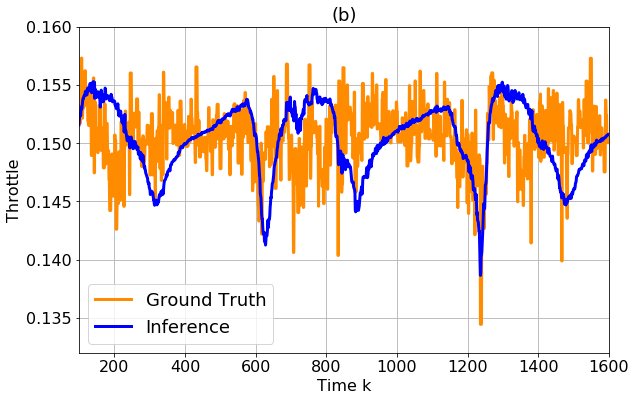

In [25]:
plt.figure(figsize= (9.5, 6))
plt.plot(t, Y1_com, linewidth=3, label = "Ground Truth", color='darkorange')
plt.plot(t, VVcY1, linewidth=3, label = "Inference", color='blue')
#plt.plot(t, VVaY1, linewidth=3, label = "Non-Phy-Cas", color='red')
#plt.plot(t, Y1_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=16)
plt.ylabel("Throttle", fontsize=16)
#plt.ylabel(r'$\mathrm{x}$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("(b)", fontsize=18)
plt.legend()
plt.rc('legend',fontsize=18) 
plt.grid()
plt.xlim([100, 1600])
plt.ylim([0.132, 0.16])
plt.savefig('vk2.pdf')  
plt.show()




#fig.savefig(image_name, format=image_format, dpi=1200)


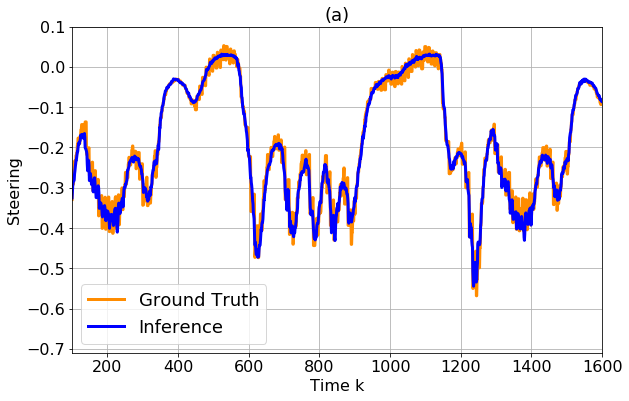

In [26]:
plt.figure(figsize= (9.5, 6))
plt.plot(t, Y2_com, linewidth=3, label = "Ground Truth", color='darkorange')
plt.plot(t, VVcY2, linewidth=3, label = "Inference", color='blue')
#plt.plot(t, VVaY2, linewidth=3, label = "Non-Phy-Cas", color='red')
#plt.plot(t, Y2_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=16)
plt.ylabel("Steering", fontsize=16)
#plt.ylabel(r'$\mathrm{y}$', fontsize=20)
plt.title("(a)", fontsize=18)
plt.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rc('legend',fontsize=18) 
plt.grid()
plt.xlim([100, 1600])
plt.ylim([-0.71, 0.1])
plt.savefig('vk1.pdf') 
#plt.show()

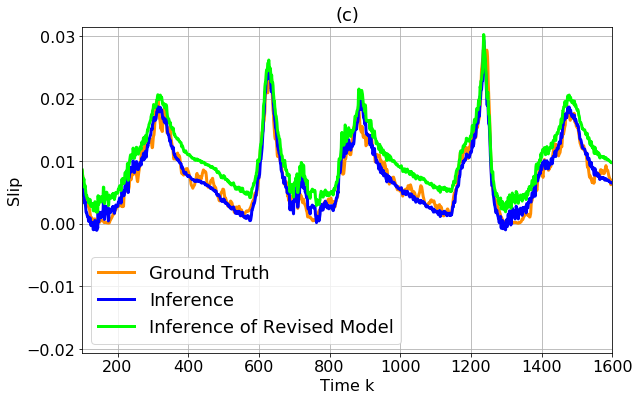

In [27]:
plt.figure(figsize= (9.5, 6))
plt.plot(t, Z2_com, linewidth=3, label = "Ground Truth", color='darkorange')
plt.plot(t, VVcZ2, linewidth=3, label = "Inference", color='blue')
plt.plot(t, VRcZ2, linewidth=3, label = "Inference of Revised Model", color='lime')
#plt.plot(t, VVaY3, linewidth=3, label = "Non-Phy-Cas", color='red')
#plt.plot(t, Y3_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=16)
plt.ylabel("Slip", fontsize=16)
plt.title("(c)", fontsize=18)
plt.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rc('legend',fontsize=18) 
plt.grid()
plt.xlim([100, 1600])
plt.ylim([-0.0206, 0.0315])
plt.savefig('vk3.pdf') 
plt.show()

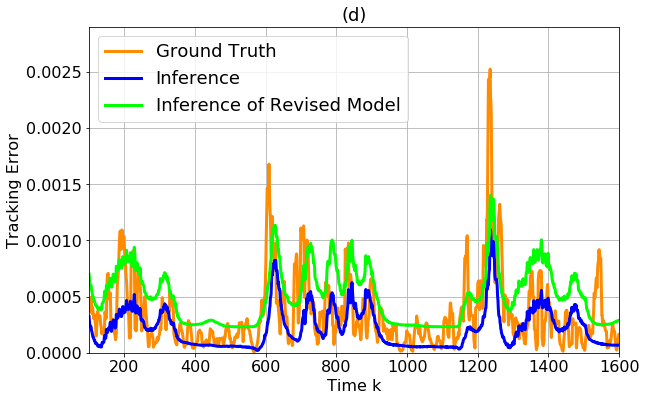

In [28]:
plt.figure(figsize= (9.5, 6))
plt.plot(t, Z1_com, linewidth=3, label = "Ground Truth", color='darkorange')
plt.plot(t, VVcZ1, linewidth=3, label = "Inference", color='blue')
plt.plot(t, VRcZ1, linewidth=3, label = "Inference of Revised Model", color='lime')
#plt.plot(t, VVaY3, linewidth=3, label = "Non-Phy-Cas", color='red')
#plt.plot(t, Y3_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=16)
plt.ylabel("Tracking Error", fontsize=16)
plt.title("(d)", fontsize=18)
plt.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.rc('legend',fontsize=18) 
plt.grid()
plt.xlim([100, 1600])
plt.ylim([-0.0000, 0.0029])
plt.savefig('vk4.pdf') 
plt.show()

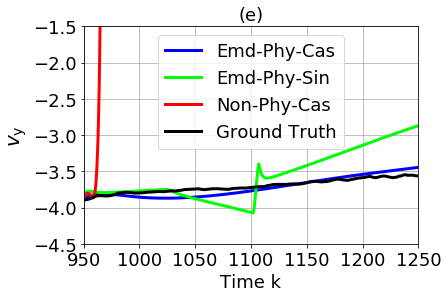

In [119]:
plt.plot(t, VVcY5, linewidth=3, label = "Emd-Phy-Cas", color='blue')
plt.plot(t, VVdY5, linewidth=3, label = "Emd-Phy-Sin", color='lime')
plt.plot(t, VVaY5, linewidth=3, label = "Non-Phy-Cas", color='red')
plt.plot(t, Y5_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$v_{\mathrm{y}}$', fontsize=20)
plt.title("(e)", fontsize=18)
plt.legend()
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend',fontsize=18) 
plt.xlim([950, 1250])
plt.ylim([-4.5, -1.5])
plt.show()

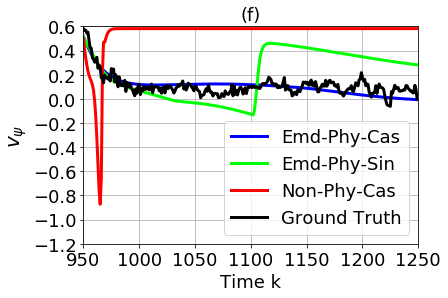

In [120]:
plt.plot(t, VVcY6, linewidth=3, label = "Emd-Phy-Cas", color='blue')
plt.plot(t, VVdY6, linewidth=3, label = "Emd-Phy-Sin", color='lime')
plt.plot(t, VVaY6, linewidth=3, label = "Non-Phy-Cas", color='red')
plt.plot(t, Y6_com, linewidth=3, label = "Ground Truth", color='black')
plt.xlabel("Time k", fontsize=18)
plt.ylabel(r'$v_{\psi}$', fontsize=20)
plt.title("(f)", fontsize=18)
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('legend',fontsize=18) 
plt.grid()
plt.xlim([950, 1250])
plt.ylim([-1.2, 0.6])
plt.show()